In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pd.set_option('max_colwidth', None)

In [2]:
df = pd.read_csv('tweets_processed.csv')
df.rename(columns={'lemmatized_tweets': 'Tweet', 'VADER_sentiment':'Sentiment'}, inplace=True)
df.head(50)

,Tweet,Sentiment
0,zydus group announce its new brand identity with the list entity of the group cadila healthcare limit to be now know as zyduslifescience limit more,Neutral
1,danger of take it or leave it compromise outcome on tripswaiver south africa express concern that the delay in approve a trip waiver be hamper effort to diversify proper production of vaccine amp address vaccine inequity covid,Negative
2,nstnation state health director dr othman warijo say the case involve a year old girl with a history of asthma who receive her vaccine at the sultanah bahiyah hospital kedah child vaccine covid pickid,Neutral
3,non medical face mask kn protect you from non oily airborne pollutant immunity vaccine testkit glove plymask ff kn,Positive
4,forsale vaccine covid covid medical life domain technology tech science medicine doctor daysofcode bot meme bigdata security cloud javascript java datascience machinelearne web nft vc investor socialmedia branding ai,Positive
5,by now the success of vaccine from and manipulate datum by pfizer about the vaccine be all over the world despite this if a tweet like this come suspect credential of the messager,Positive
6,another achievement in india 's fight against covid corbevax the makeinindia vaccine have be approve for emergency use for child in the age group of year indiafightscorona,Negative
7,australia epidemiologist warn it be too early to unwind covid health measure keep wear mask distance get booster vaccine covid aus covid au mask vaccines vaccination covid longcovid auspol nswpol qldpol saparli springst,Negative
8,multilingual news service arabic february news covid media coronavirus currentaffair breakingnews journalism corona trend latestnew politic article press community vaccine arabic,Neutral
9,ahmedabad have at least new slot available between amp covishield dose dose covaxin dose dose book one now at vaccine cowin covid ahmedabad,Neutral


In [3]:
df.dropna(inplace=True)

In [4]:
df['label'] = df['Sentiment'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})

In [5]:
df.head()

,Tweet,Sentiment,label
0,zydus group announce its new brand identity with the list entity of the group cadila healthcare limit to be now know as zyduslifescience limit more,Neutral,0
1,danger of take it or leave it compromise outcome on tripswaiver south africa express concern that the delay in approve a trip waiver be hamper effort to diversify proper production of vaccine amp address vaccine inequity covid,Negative,-1
2,nstnation state health director dr othman warijo say the case involve a year old girl with a history of asthma who receive her vaccine at the sultanah bahiyah hospital kedah child vaccine covid pickid,Neutral,0
3,non medical face mask kn protect you from non oily airborne pollutant immunity vaccine testkit glove plymask ff kn,Positive,1
4,forsale vaccine covid covid medical life domain technology tech science medicine doctor daysofcode bot meme bigdata security cloud javascript java datascience machinelearne web nft vc investor socialmedia branding ai,Positive,1


## Class Balance

In [6]:
balance = df['Sentiment'].value_counts(normalize=True).mul(100).reset_index()

In [7]:
balance

,index,Sentiment
0,Positive,40.598920
1,Neutral,33.038783
2,Negative,26.362297


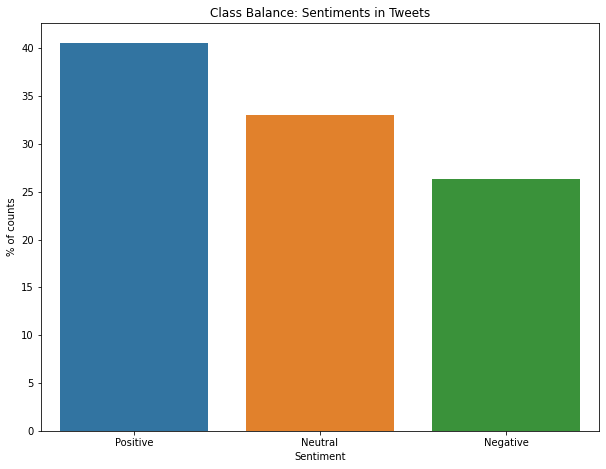

In [14]:
plt.figure(figsize=(10, 7.5))
sns.barplot(data=balance, x='index', y='Sentiment')
plt.title('Class Balance: Sentiments in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('% of counts')
plt.show()

## Split dataset

In [17]:
X = df['Tweet']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

## Vectorizer

In [26]:
stop_words = stopwords.words('english')
stop_words.extend(['covid', 'dose', 'vaccine', 'vaccination', 'amp', 'coronavirus'])

In [27]:
# Initialize the vectorizer
vectorizer = TfidfVectorizer(min_df=5, lowercase=True, stop_words=stop_words)

# Fit it on X_train
vectorizer.fit(X_train)

# Transform
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [28]:
len(vectorizer.get_feature_names())

C:\Users\maren\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


838

In [29]:
words = vectorizer.get_feature_names()
word_counts = X_train_vec.toarray().sum(axis=0)

In [30]:
words_df = pd.DataFrame({"token": words, "count": word_counts})
    
words_df.sort_values(by="count", ascending=False).head(10)

,token,count
286,get,30.648636
309,health,27.438074
524,people,25.539949
498,omicron,25.086984
85,booster,24.264401
478,new,22.901393
512,pandemic,20.457314
501,one,20.414549
641,say,17.594011
119,child,17.100483


## Modeling

### Logistic Regression

In [32]:
# instantiate a logistic regression
logreg = LogisticRegression(max_iter=500)

# fit the model to train set only
logreg.fit(X_train_vec, y_train)

# score the model
print(f'Train accuracy: {logreg.score(X_train_vec, y_train).round(3)}')
print(f'Validation accuracy: {logreg.score(X_test_vec, y_test).round(3)}')

Train accuracy: 0.881
Validation accuracy: 0.658


In [33]:
y_pred = logreg.predict(X_test_vec)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.66      0.54      0.60       178
           0       0.63      0.68      0.65       222
           1       0.69      0.72      0.70       273

    accuracy                           0.66       673
   macro avg       0.66      0.65      0.65       673
weighted avg       0.66      0.66      0.66       673



In [40]:
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
confusion_df.index = ['Actual -1', 'Actual 0', 'Actual 1']
confusion_df.columns = ['Predicted -1', 'Predicted 0', 'Predicted 1']
confusion_df

,Predicted -1,Predicted 0,Predicted 1
Actual -1,97,43,38
Actual 0,20,150,52
Actual 1,31,46,196


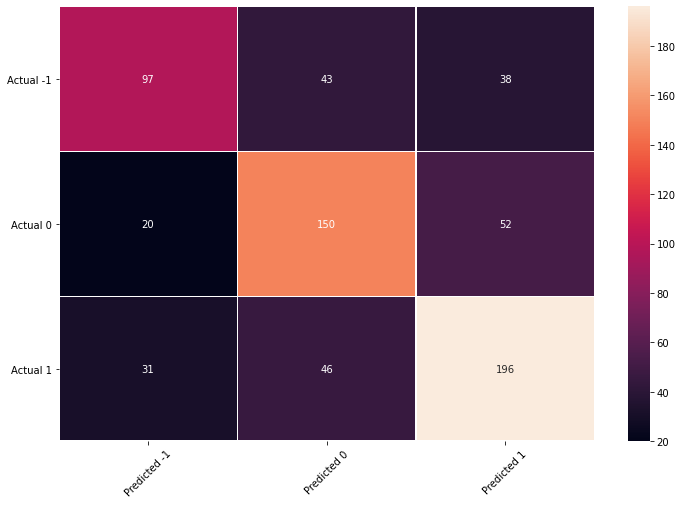

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', linewidths=0.5) 
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

### Random Forest

In [43]:
# instantiate a logistic regression
RF_model = RandomForestClassifier()

# fit the model to train set only
RF_model.fit(X_train_vec, y_train)

# score the model
print(f'Train accuracy: {RF_model.score(X_train_vec, y_train).round(3)}')
print(f'Validation accuracy: {RF_model.score(X_test_vec, y_test).round(3)}')

Train accuracy: 0.993
Validation accuracy: 0.673


In [44]:
y_pred = RF_model.predict(X_test_vec)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.72      0.54      0.62       178
           0       0.61      0.77      0.68       222
           1       0.72      0.68      0.70       273

    accuracy                           0.67       673
   macro avg       0.68      0.66      0.67       673
weighted avg       0.68      0.67      0.67       673



In [46]:
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
confusion_df.index = ['Actual -1', 'Actual 0', 'Actual 1']
confusion_df.columns = ['Predicted -1', 'Predicted 0', 'Predicted 1']
confusion_df

,Predicted -1,Predicted 0,Predicted 1
Actual -1,96,49,33
Actual 0,12,172,38
Actual 1,26,62,185


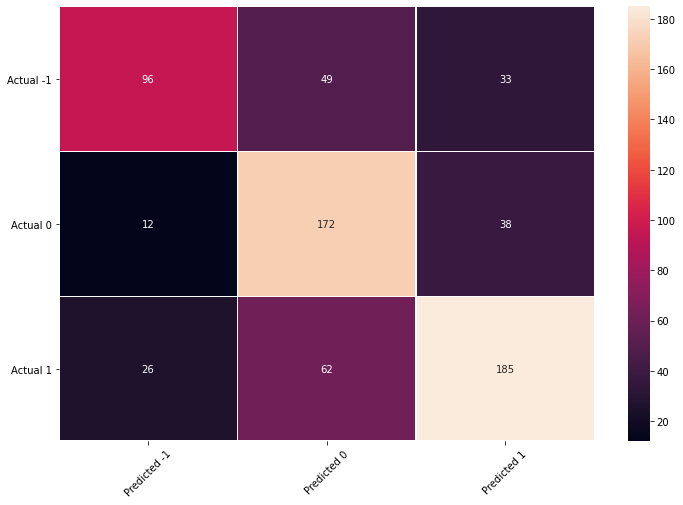

In [47]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', linewidths=0.5) 
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()